# Test File For Rain in Africa

The following is a demo file for tracking the region with the most rainfall in AUS

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
weather_data_raw <- read_csv("weatherAUS.csv")

Rows: 145460 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTom...
dbl  (16): MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed,...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
weather_data <- weather_data_raw |> 
                select(Date, Location, Rainfall)

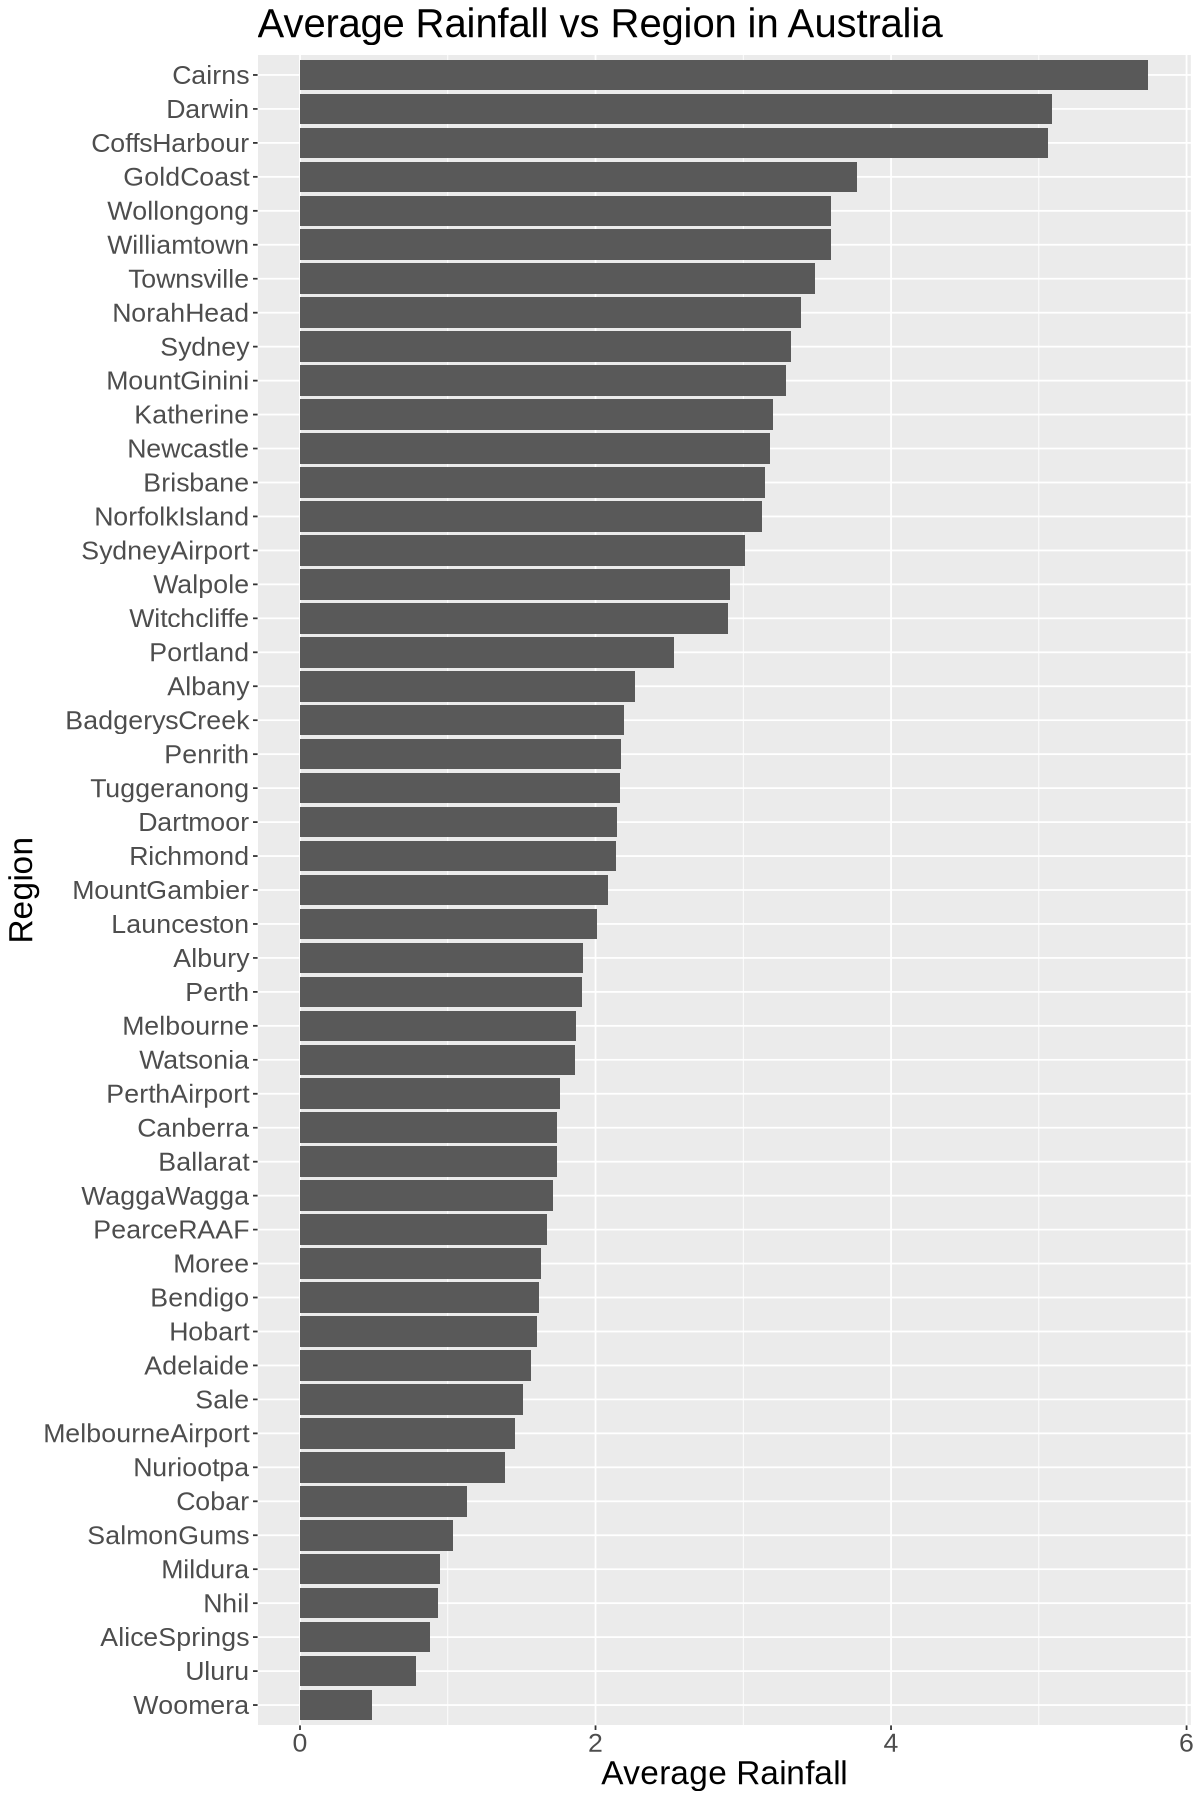

In [5]:
options(repr.plot.width = 10, repr.plot.height = 15) 
splot <- weather_data |> 
        group_by(Location) |>
        summarize(average_rain = mean(Rainfall, na.rm = TRUE)) |>           
        ggplot(aes(x = average_rain, y = fct_reorder(Location, average_rain))) +
            geom_bar(stat = "identity") +
            labs(x = "Average Rainfall", y = "Region", title = "Average Rainfall vs Region in Australia") +
            theme(text = element_text(size = 20))
splot

## Rainfall Level Distribution

How much rain per rainy day across. This is a visualization of the rain levels per rainy day.

Warning message:
“Removed 151 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


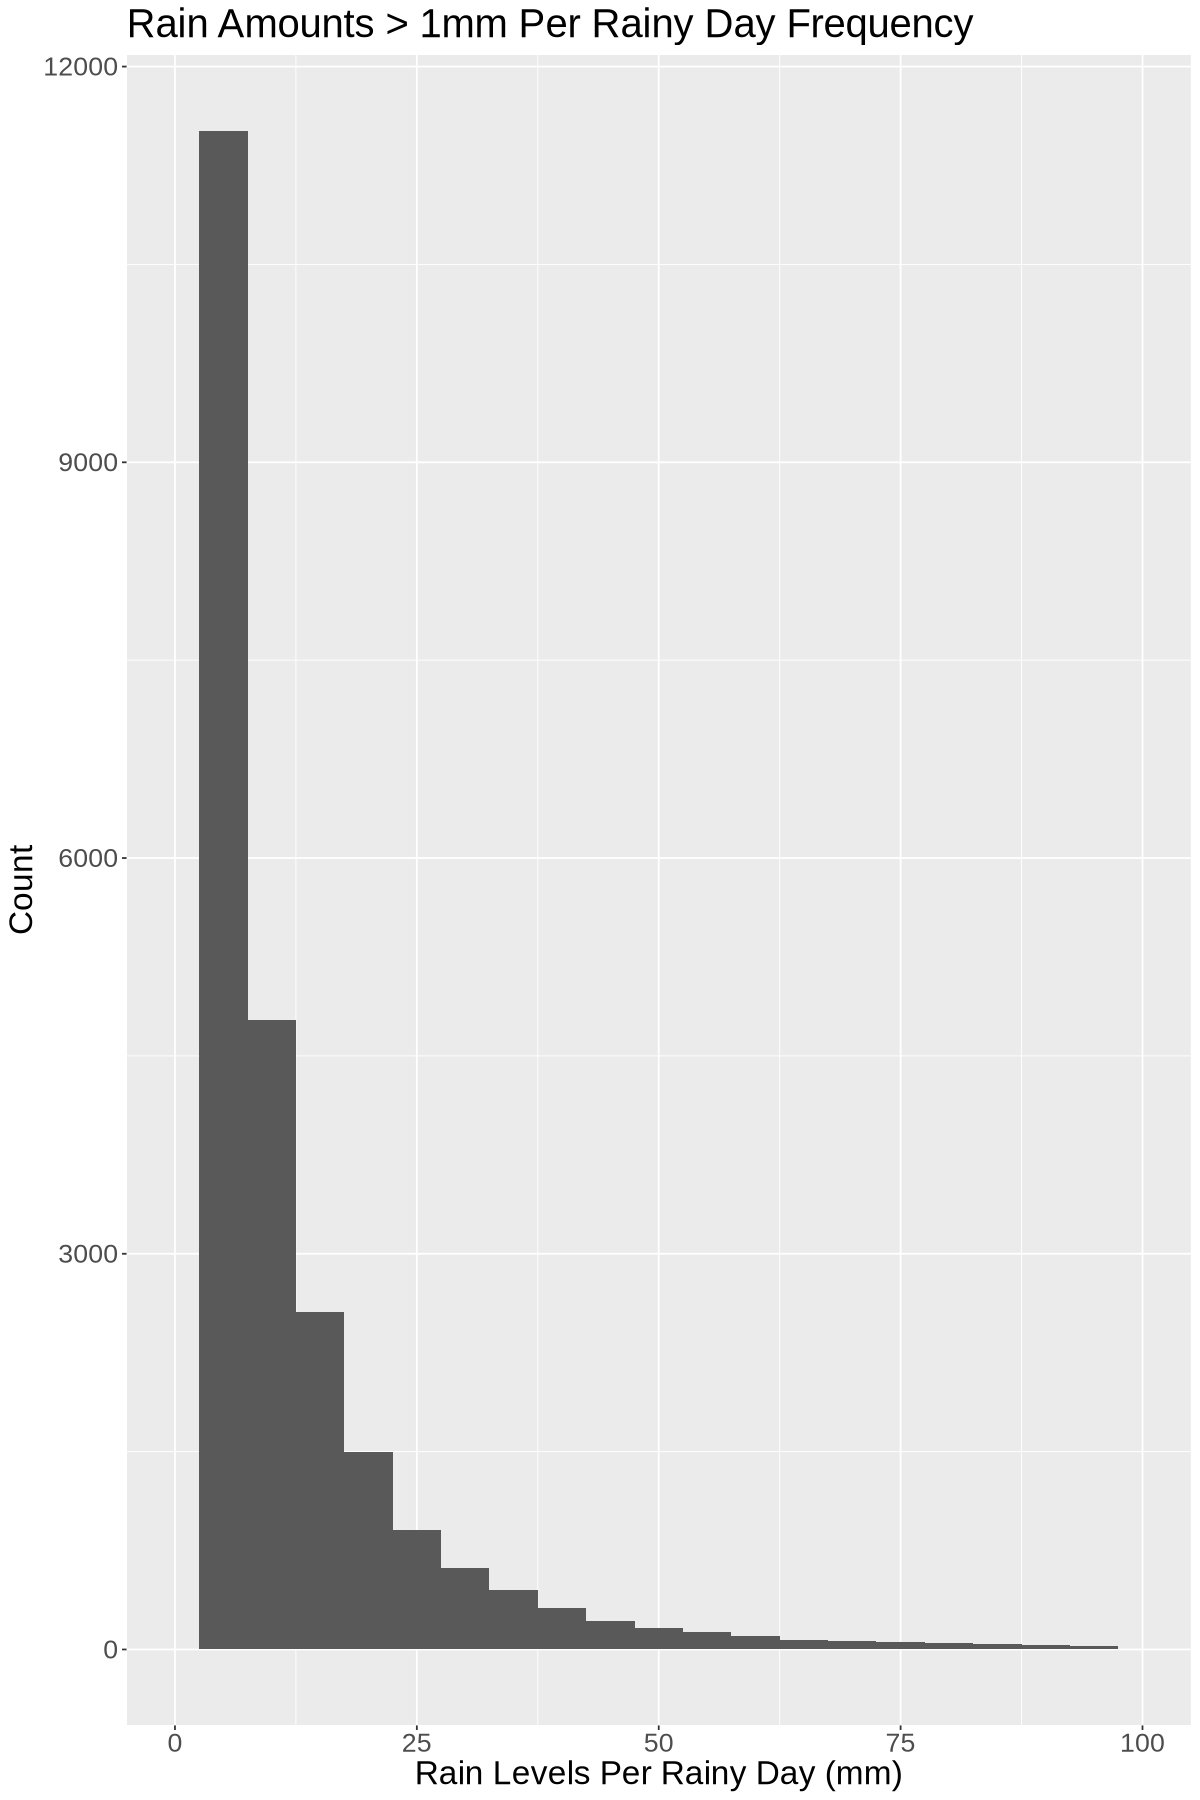

In [6]:
options(repr.plot.width = 10, repr.plot.height = 15) 
rain_level_plot <- weather_data_raw |>
                    select(Rainfall) |>
                    filter(Rainfall > 1) |>
                    ggplot(aes(x=Rainfall)) +
                        geom_histogram(binwidth = 5) +
                        labs(x = "Rain Levels Per Rainy Day (mm)", y = "Count", title = "Rain Amounts > 1mm Per Rainy Day Frequency") +
                        xlim(0, 100) +
                    theme(text = element_text(size = 20))
rain_level_plot

### Per Variable Validity Summary

To aid in our decision for predictor variables, we can visualize which columns are present with the most valid data (least NA columns). A larger sample of data would allow us to reduce the impact of factors such as random error in the observation process and improve the overall quality of the analysis. We will select the three major cities we want to analyze and remove the categorical  variables from our dataset.

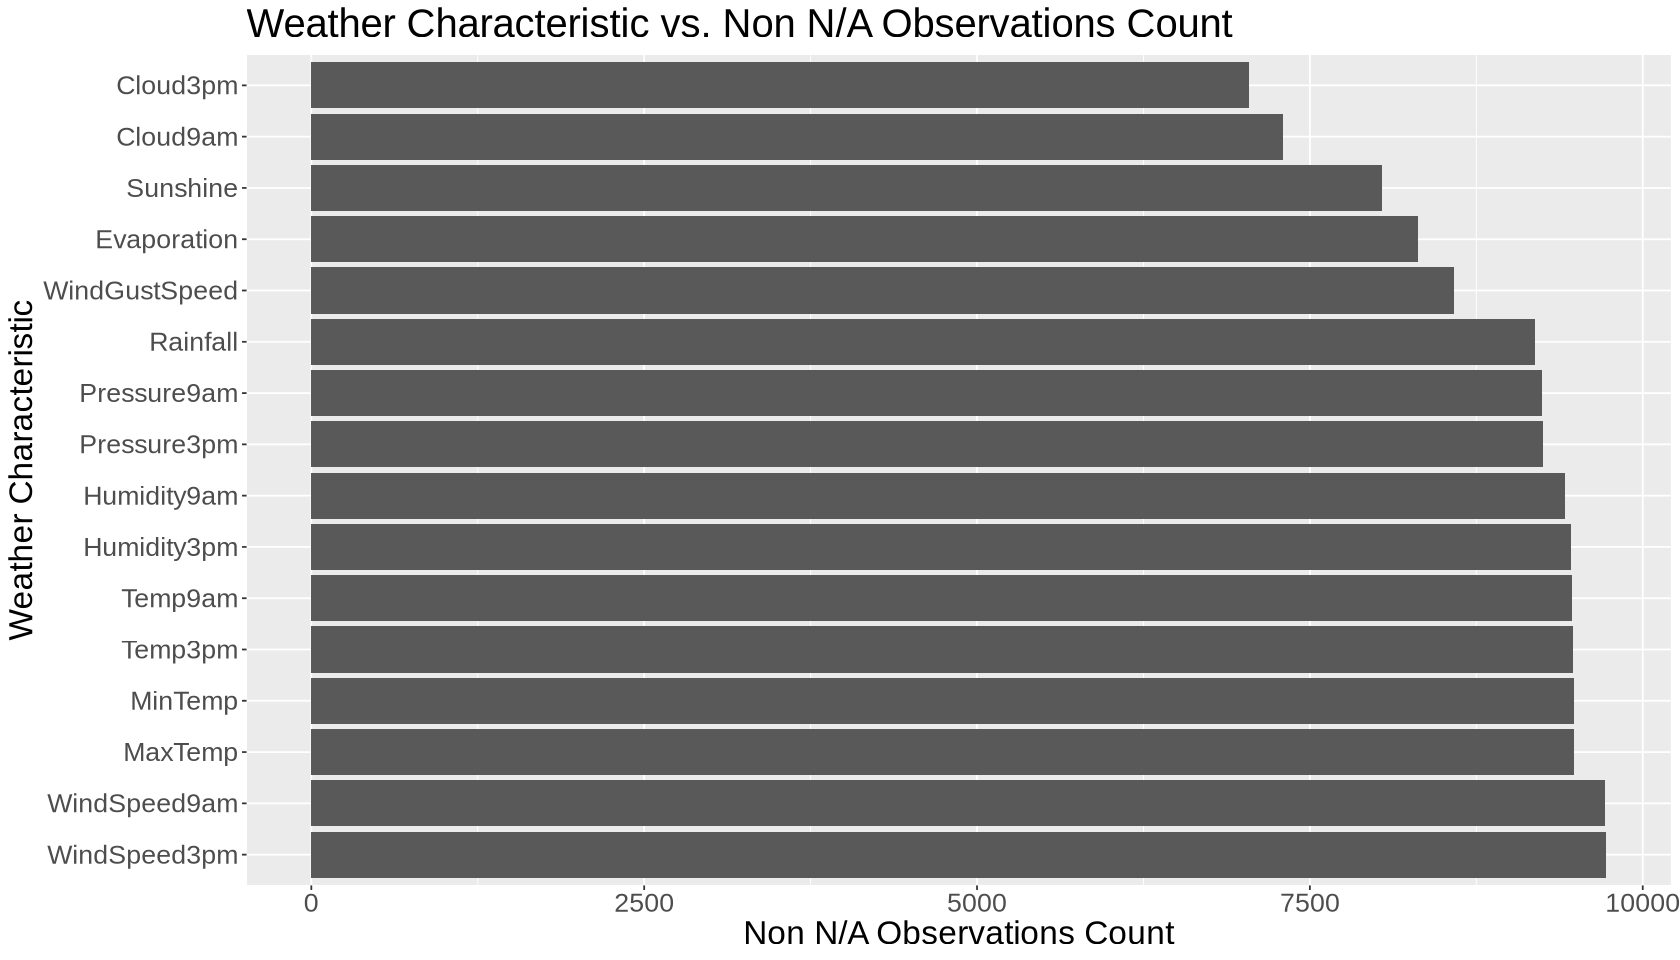

In [52]:
options(repr.plot.width =14, repr.plot.height = 8) 
count <- weather_data_raw |>
            filter(Location=="Sydney" | Location=="Melbourne" | Location=="Canberra") |>
            select(-WindGustDir, -WindDir9am, -WindDir3pm, -RainToday, -RainTomorrow, -Date, -Location) 

# Summarizes each row by counting non N/A cells. Renames the variables afterwards after conversion to data frame
output <- as.data.frame((colSums(!is.na(count)))) 
output <- cbind(rownames(output), output)
rownames(output) <- NULL
colnames(output) <- c("measurement","count")

valid_data_plot <- output |> 
                    arrange(desc(count)) |>
                    ggplot(aes(x=count, fct_reorder(measurement, count, .desc=TRUE))) +
                        geom_bar(stat="identity") +
                        labs(x = "Non N/A Observations Count", y = "Weather Characteristic", title = "Weather Characteristic vs. Non N/A Observations Count") +
                        theme(text = element_text(size = 20))
valid_data_plot

From our observations, we can decide that the best variables to use for our analysis are WindSpeed, Temperature (all), Humidity, Pressure, and Rainfall.